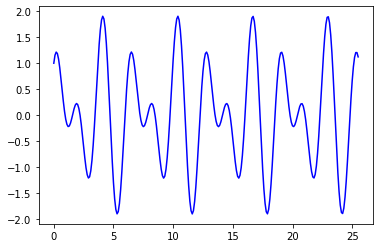

In [22]:
import math
import matplotlib as mpl 
import matplotlib.pyplot as plt 

x = [0.1*i for i in range(256)]
y = []

n = len(x)

for i in range(n):
    y.append(math.cos(3*x[i]) + math.sin(2*x[i]))

plt.plot(x, y, color='blue') 

Text(0.5, 1.0, 'Фазовый спектр сигнала')

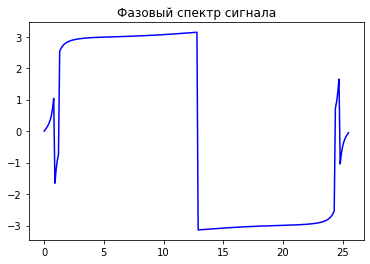

In [23]:
#ПДПФ

import cmath

def pdpf(y):
    c = []
    for k in range(n):
        w_k = math.e ** ((2*math.pi*complex(0, 1)*k) / n)
        c_k = 0
        for m in range(n):
            c_k += y[m] * (w_k ** m)
        c.append(c_k)
    return c

q = pdpf(y)
w = []
for i in range(n):
    w.append(cmath.phase(q[i]))

plt.plot(x, w, color='blue')  
plt.title("Фазовый спектр сигнала")

Text(0.5, 1.0, 'Амплитудный спектр сигнала')

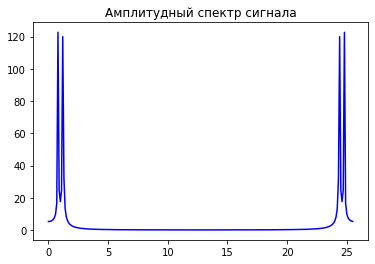

In [24]:
c = pdpf(y)
c_abs = []
for i in range(n):
    c_abs.append(abs(c[i]))
    
plt.plot(x, c_abs, color='blue')  
plt.title("Амплитудный спектр сигнала")

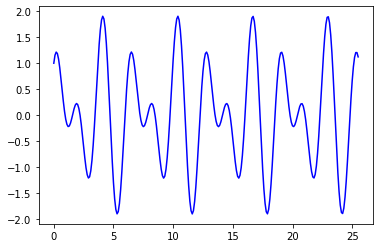

In [25]:
#ОДПФ

x_d = []
for m in range(n):
    w_m = math.e ** ((-1*2*math.pi*complex(0, 1)*m) / n)
    x_m = 0
    for k in range(n):
        x_m += c[k] * (w_m ** k)
    x_d.append(x_m / n)

plt.plot(x, x_d, color='blue') 

Text(0.5, 1.0, 'Фазовый спектр сигнала')

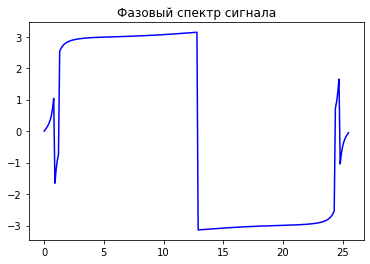

In [26]:
#ПБПФ

def bpf(a, n, e):
    m = len(a)
    if m == 1:
        return a
    else:
        b_ch = []
        b_nch = []
        for i in range(m):
            if i % 2 == 0:
                b_ch.append(a[i])
            else:
                b_nch.append(a[i])
        b_ch = bpf(b_ch, n, e)
        b_nch = bpf(b_nch, n, e)
        
        y = [0 for i in range(len(a))]
        w_n = e ** ((2*math.pi*complex(0, 1)) / n)
        w_n = w_n ** (n // m)
        w = 1
        for i in range(m // 2):
            t = w*b_nch[i]
            y[i] = b_ch[i] + t
            y[i+(m//2)] = b_ch[i] - t
            w = w*w_n
        return y
    
q = bpf(y, len(y), math.e)
w = []
for i in range(n):
    w.append(cmath.phase(q[i]))
    
plt.plot(x, w, color='blue') 
plt.title("Фазовый спектр сигнала")

Text(0.5, 1.0, 'Амплитудный спектр сигнала')

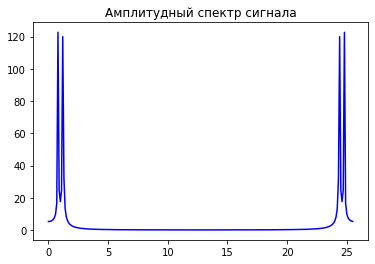

In [27]:
y2_abs = []
y2_bpf = bpf(y, len(y), math.e)
for i in range(len(y)):
    y2_abs.append(abs(y2_bpf[i]))
    
plt.plot(x, y2_abs, color='blue') 
plt.title("Амплитудный спектр сигнала")

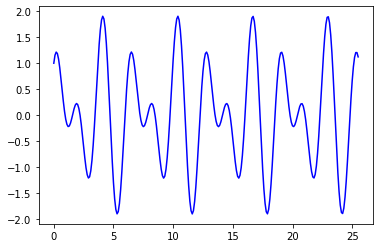

In [28]:
#ОБПФ

def obpf(a, n):    
    y = bpf(a, n, math.e ** (-1))
    for i in range(len(y)):
        y[i] /= n
    return y
    
plt.plot(x, obpf(y2_bpf, len(y2_bpf)), color='blue') 